# Importing the modules

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Loading the data

In [45]:
loan=pd.read_csv('loan_approval_dataset.csv')
loan

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


# Data cleaning

In [46]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [47]:
loan.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [48]:
loan.columns.tolist()

['loan_id',
 ' no_of_dependents',
 ' education',
 ' self_employed',
 ' income_annum',
 ' loan_amount',
 ' loan_term',
 ' cibil_score',
 ' residential_assets_value',
 ' commercial_assets_value',
 ' luxury_assets_value',
 ' bank_asset_value',
 ' loan_status']

In [49]:
loan.columns=loan.columns.str.split().str[0]

In [50]:
loan.columns.tolist()

['loan_id',
 'no_of_dependents',
 'education',
 'self_employed',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value',
 'loan_status']

In [51]:
loan['education']=loan['education'].str.lstrip()
loan['self_employed']=loan['self_employed'].str.lstrip()
loan['loan_status']=loan['loan_status'].str.lstrip()

In [52]:
loan.drop(['education','self_employed','loan_status'],axis=1).corr()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,1.000000,0.005326,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765
no_of_dependents,0.005326,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163
income_annum,0.012592,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093
loan_amount,0.008170,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122
loan_term,0.009809,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177
cibil_score,0.016323,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478
residential_assets_value,0.020936,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418
commercial_assets_value,0.018595,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576
luxury_assets_value,-0.000862,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517
bank_asset_value,0.010765,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000


# Exploratary Data Analysis

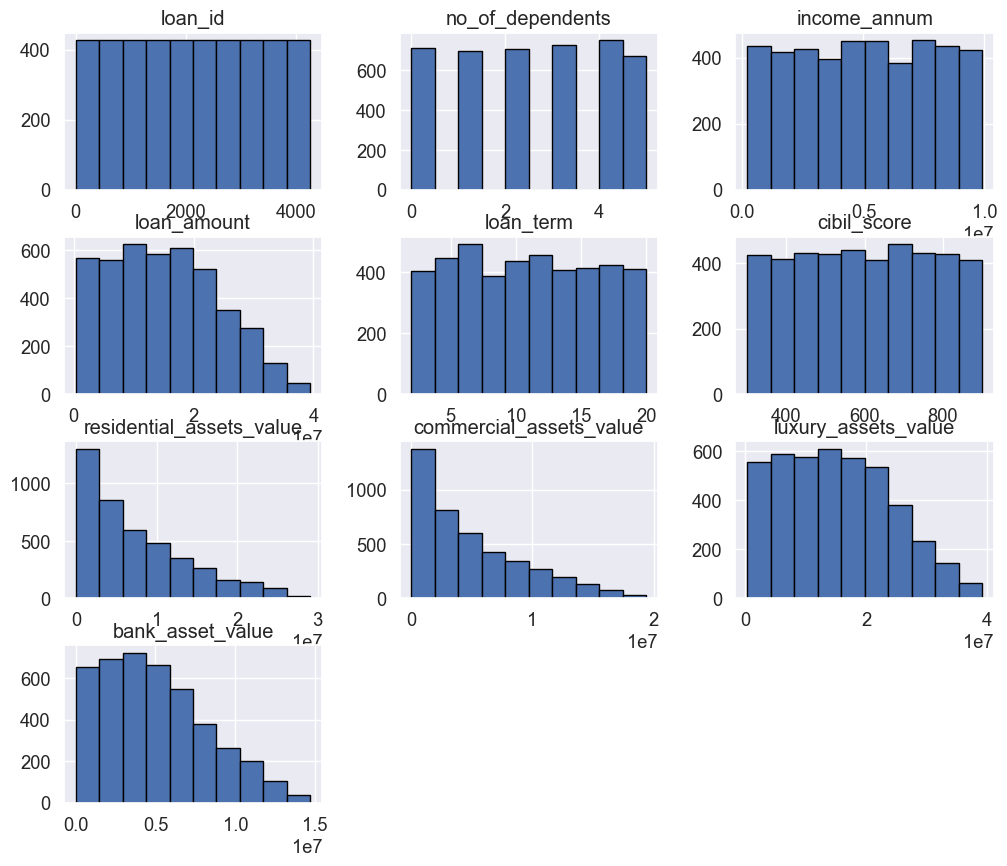

In [53]:
loan.hist(figsize=(12,10),bins=10,edgecolor='black')
plt.show()

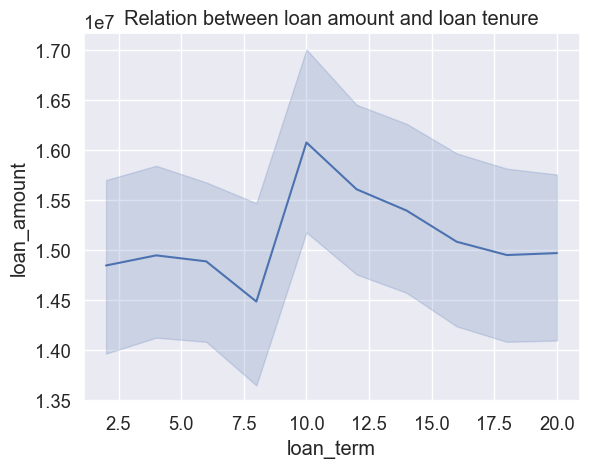

In [54]:
plt.title('Relation between loan amount and loan tenure')
sns.lineplot(data=loan,x='loan_term',y='loan_amount')
plt.show()

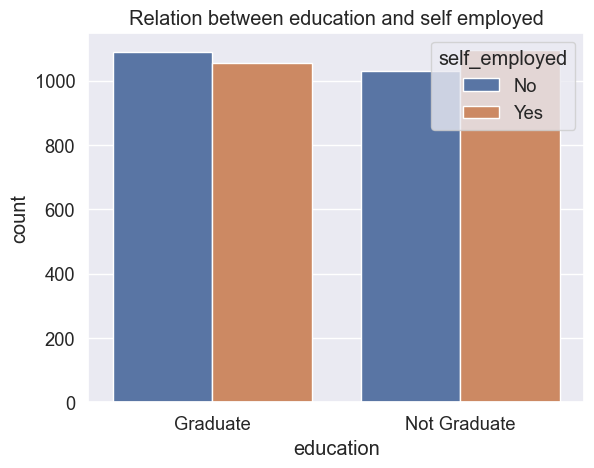

In [55]:
sns.countplot(data=loan,x='education',hue='self_employed')
plt.title("Relation between education and self employed")
plt.show()

<Axes: xlabel='income_annum', ylabel='loan_amount'>

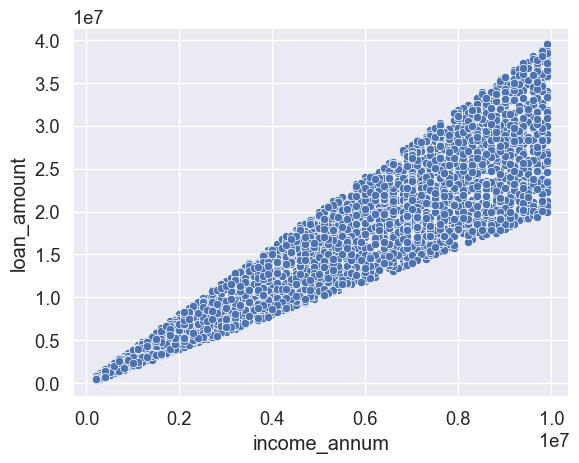

In [56]:
sns.scatterplot(data=loan,x='income_annum',y='loan_amount')

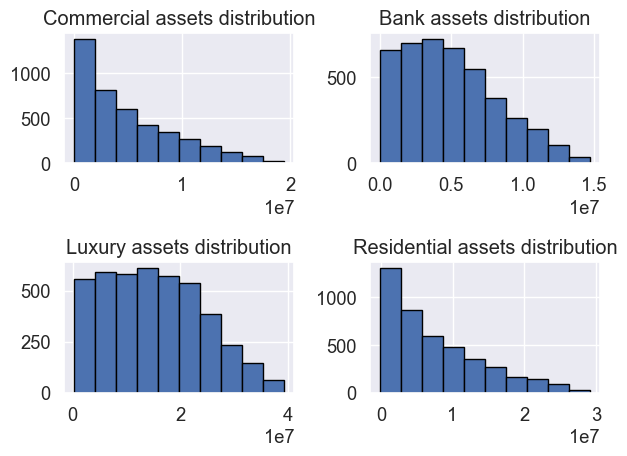

In [57]:
fig,ax=plt.subplots(2,2)

ax[0][0].hist(loan['commercial_assets_value'],bins=10,edgecolor='black')
ax[0][0].set_title('Commercial assets distribution')
ax[0][1].hist(loan['bank_asset_value'],bins=10,edgecolor='black')
ax[0][1].set_title('Bank assets distribution')
ax[1][0].hist(loan['luxury_assets_value'],bins=10,edgecolor='black')
ax[1][0].set_title('Luxury assets distribution')
ax[1][1].hist(loan['residential_assets_value'],bins=10,edgecolor='black')
ax[1][1].set_title('Residential assets distribution')
plt.tight_layout()

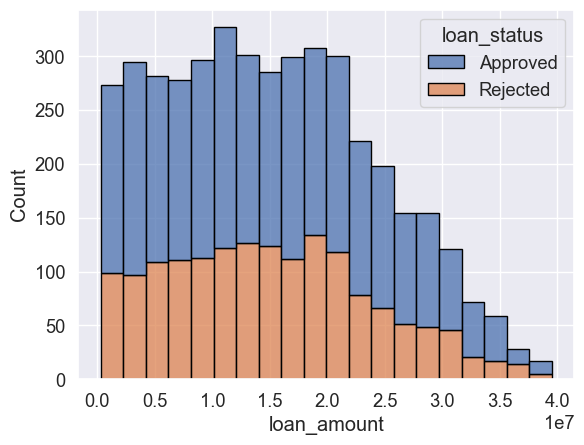

In [58]:
sns.histplot(data=loan,x='loan_amount',bins=20,edgecolor='black',hue='loan_status',multiple='stack')
plt.show()

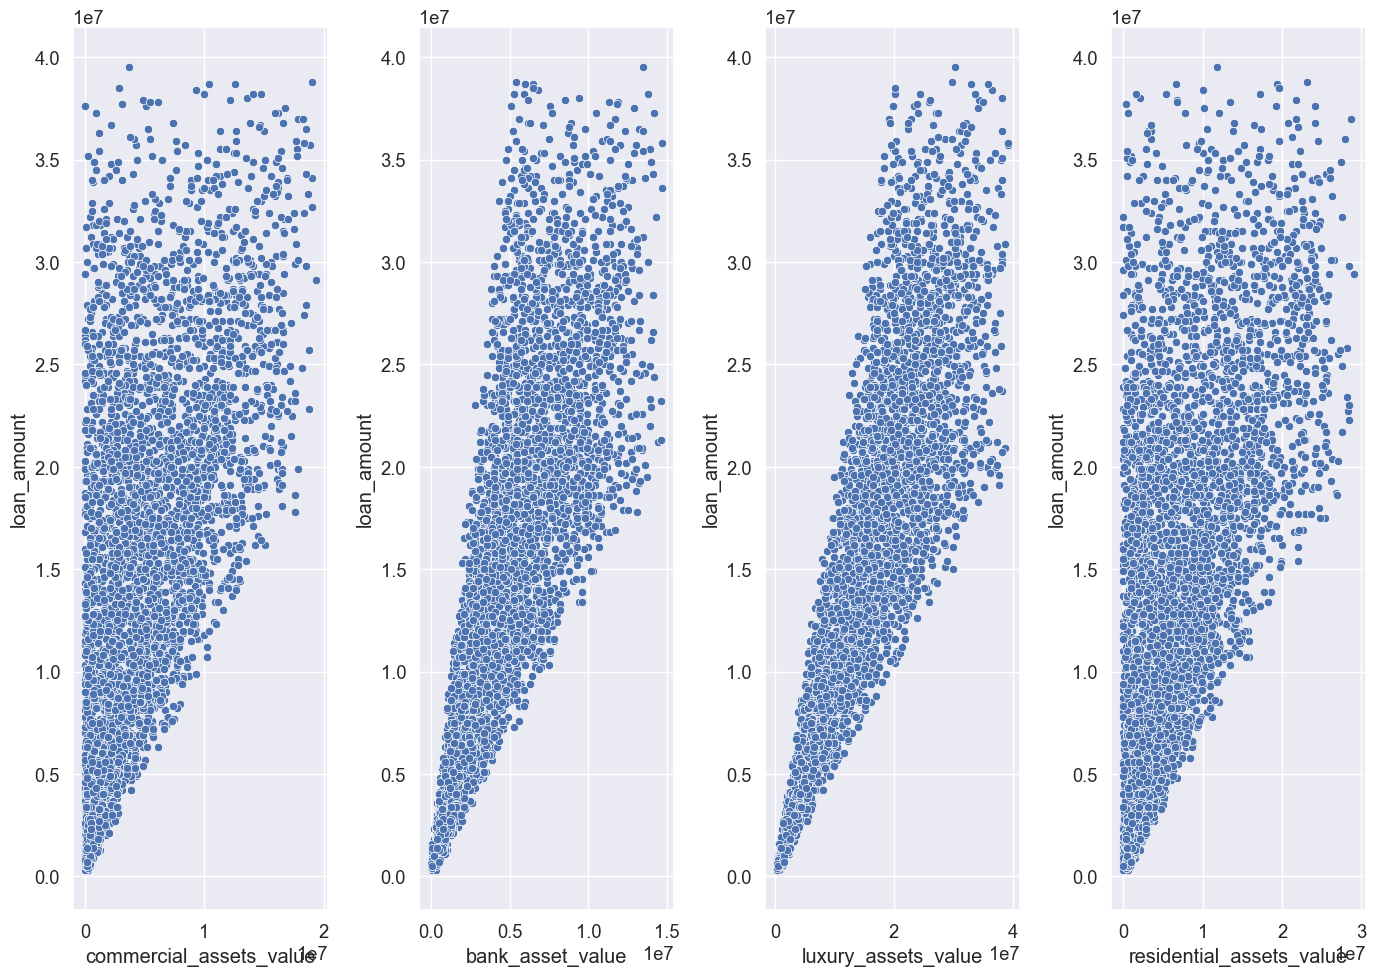

In [59]:
fig,ax=plt.subplots(1,4, figsize=(14,10))

sns.scatterplot( data=loan, x='commercial_assets_value', y='loan_amount', ax=ax[0])
sns.scatterplot( data=loan, x='bank_asset_value', y='loan_amount', ax=ax[1])
sns.scatterplot( data=loan, x='luxury_assets_value', y='loan_amount', ax=ax[2])
sns.scatterplot( data=loan, x='residential_assets_value', y='loan_amount', ax=ax[3])

plt.tight_layout()

<Axes: xlabel='no_of_dependents', ylabel='loan_amount'>

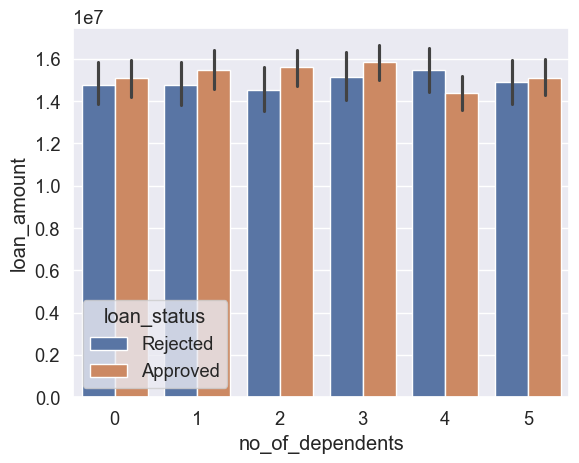

In [60]:
sns.barplot(data=loan,x='no_of_dependents',y='loan_amount',hue='loan_status')

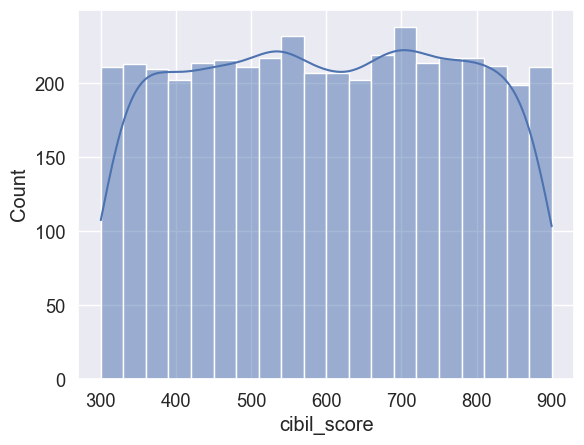

In [61]:
sns.histplot(data=loan,x='cibil_score',bins=20,kde=True)
plt.show()

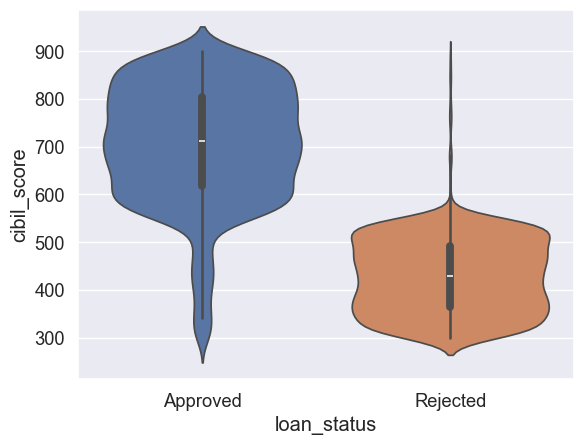

In [62]:
sns.violinplot(data=loan,x='loan_status',y='cibil_score',hue='loan_status')
plt.show()

<Axes: >

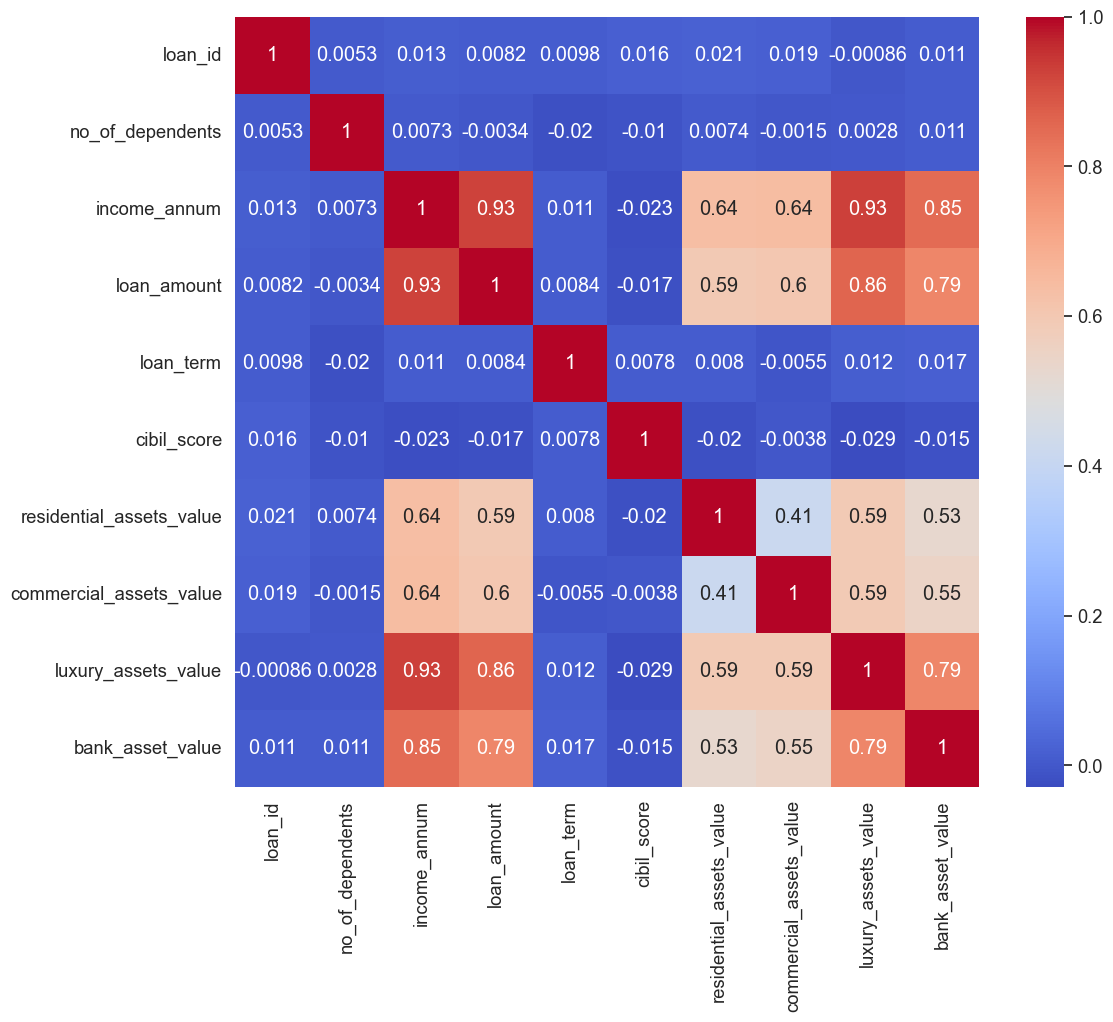

In [63]:
numerical_cols=loan.drop(columns=['education','self_employed','loan_status'])

plt.figure(figsize=(12,10))
sns.heatmap(numerical_cols.corr(),annot=True,cmap='coolwarm')

# Data preprocessing

In [64]:
loan['education']=loan['education'].map({'Graduate':0,'Not Graduate':1})
loan['self_employed']=loan['self_employed'].map({'No':0,'Yes':1})
loan['loan_status']=loan['loan_status'].map({'Rejected':0,'Approved':1})

In [65]:
X=loan.drop(['loan_id','loan_status'],axis=1)
y=loan['loan_status']

In [66]:
X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [67]:
y

0       1
1       0
2       0
3       0
4       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4269, dtype: int64

# Splitting training and testing data

In [68]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

# 1. Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf=GridSearchCV(rfc,param_grid,cv=5)
grid_rf.fit(X_train,y_train)

best_hyperparameters = grid_rf.best_params_
print("Best Hyperparameters (Random Forest):", best_hyperparameters)

train_accuracy = accuracy_score(y_train, grid_rf.predict(X_train))
test_accuracy = accuracy_score(y_test, grid_rf.predict(X_test))

print("Random Forest Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Best Hyperparameters (Random Forest): {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.9742388758782201


# 2. Support Vector Model

In [28]:
from sklearn.svm import SVC

svm=SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_svm=GridSearchCV(svm,param_grid,cv=5)
grid_svm.fit(X_train,y_train)

best_hyperparameters = grid_svm.best_params_
print("Best Hyperparameters (Support Vector Model):", best_hyperparameters)

train_accuracy = accuracy_score(y_train, grid_svm.predict(X_train))
test_accuracy = accuracy_score(y_test, grid_svm.predict(X_test))

print("Support Vector Model Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Best Hyperparameters (Support Vector Model): {'C': 10, 'kernel': 'rbf'}
Support Vector Model Classifier:
Training Accuracy: 0.9786237188872621
Testing Accuracy: 0.9332552693208431


# 3. Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()

nbm=nb.fit(X_train,y_train)

train_accuracy = accuracy_score(y_train, nbm.predict(X_train))
test_accuracy = accuracy_score(y_test, nbm.predict(X_test))

print("Naive Bayes Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Naive Bayes Classifier:
Training Accuracy: 0.935285505124451
Testing Accuracy: 0.9332552693208431


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()

param_grid = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_gbc=GridSearchCV(gbc,param_grid,cv=5)
grid_gbc.fit(X_train,y_train)

best_hyperparameters = grid_gbc.best_params_
print("Best Hyperparameters (Gradient boost Classifier):", best_hyperparameters)

train_accuracy = accuracy_score(y_train, grid_gbc.predict(X_train))
test_accuracy = accuracy_score(y_test, grid_gbc.predict(X_test))

print("Gradient boost Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Best Hyperparameters (Gradient boost Classifier): {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Gradient boost Classifier:
Training Accuracy: 1.0
Testing Accuracy: 0.9742388758782201


In [31]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt=GridSearchCV(dt,param_grid,cv=5)
grid_dt.fit(X_train,y_train)

best_hyperparameters = grid_dt.best_params_
print("Best Hyperparameters (Decision Tree Classifier):", best_hyperparameters)

train_accuracy = accuracy_score(y_train, grid_dt.predict(X_train))
test_accuracy = accuracy_score(y_test, grid_dt.predict(X_test))

print("Decision Tree Classifier:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Best Hyperparameters (Decision Tree Classifier): {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree Classifier:
Training Accuracy: 0.9988286969253294
Testing Accuracy: 0.9730679156908665


# Model Evaluation (using confusion matrix and classification report)

In [32]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

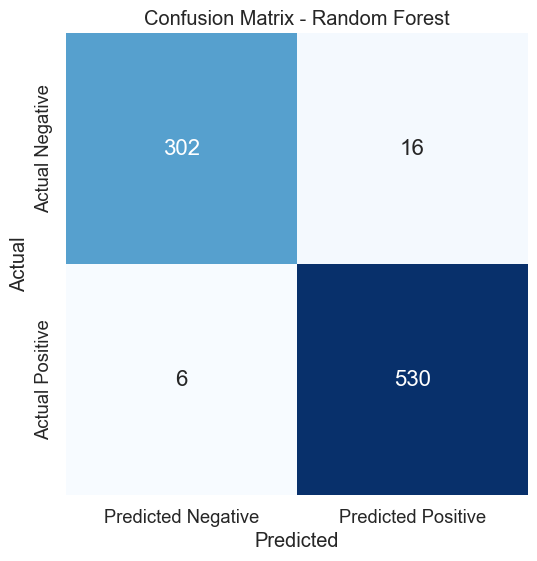

Classification report - Random Forest;

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       318
           1       0.97      0.99      0.98       536

    accuracy                           0.97       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



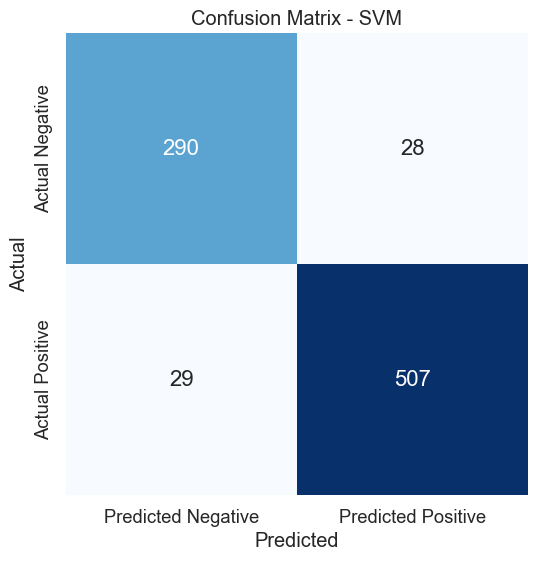

Classification report - SVM;

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       318
           1       0.95      0.95      0.95       536

    accuracy                           0.93       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854



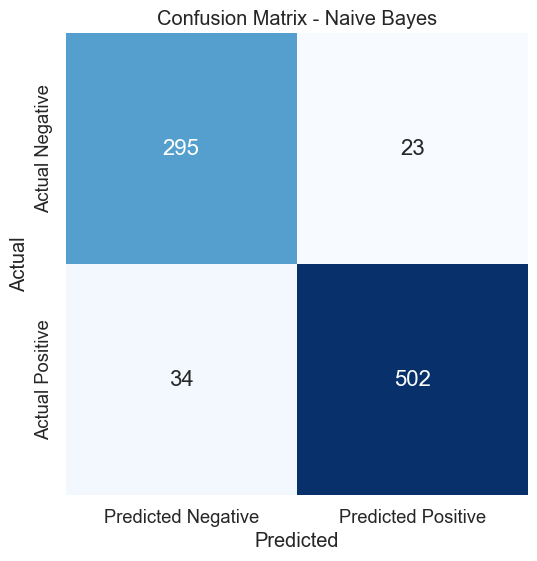

Classification report - Naive Bayes;

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       318
           1       0.96      0.94      0.95       536

    accuracy                           0.93       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854



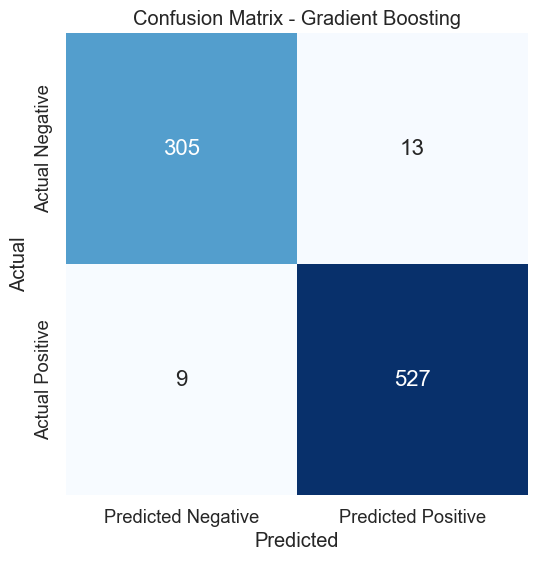

Classification report - Gradient Boosting;

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



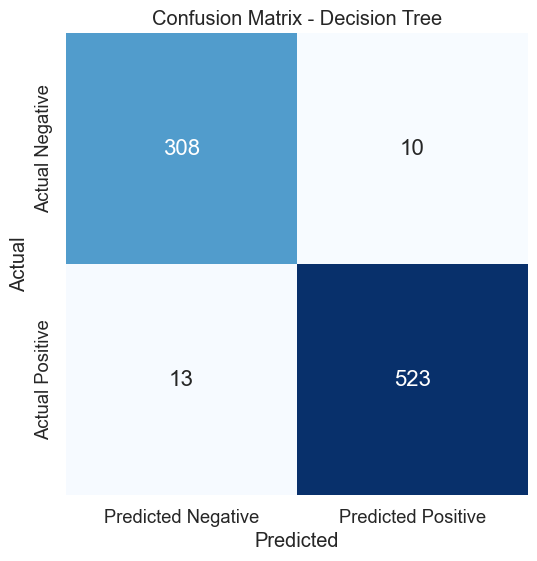

Classification report - Decision Tree;

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       318
           1       0.98      0.98      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



In [33]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

models = [
    ("Random Forest", grid_rf),
    ("SVM", grid_svm),
    ("Naive Bayes", nbm),
    ("Gradient Boosting", grid_gbc),
    ("Decision Tree", grid_dt),
]

for model_name,model in models:
    prediction=model.predict(X_test)
    
    cm=confusion_matrix(y_test,prediction)
    
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                annot_kws={"size": 16}, square=True,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    
    print(f'Classification report - {model_name};\n')
    print(classification_report(y_test,prediction))
    

In [34]:
from sklearn.model_selection import cross_val_score

models = [
    ("Random Forest", grid_rf.best_estimator_),
    ("SVM", grid_svm.best_estimator_),
    ("Naive Bayes", nbm),
    ("Gradient Boosting", grid_gbc.best_estimator_),
    ("Decision Tree", grid_dt.best_estimator_),
]

for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{name} - CV Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")


Random Forest - CV Accuracy: 0.9786 (+/- 0.0022)
SVM - CV Accuracy: 0.9485 (+/- 0.0114)
Naive Bayes - CV Accuracy: 0.9350 (+/- 0.0057)
Gradient Boosting - CV Accuracy: 0.9813 (+/- 0.0028)
Decision Tree - CV Accuracy: 0.9795 (+/- 0.0036)


# Saving the naive bayes model

In [35]:
import pickle

pickle.dump(nbm, open("model.pkl", "wb"))

In [69]:
scaler=StandardScaler()
scaler.fit(X_train,y_train)

StandardScaler()

In [70]:
pickle.dump(scaler, open("scaler.pkl", "wb"))

In [40]:
nbm.predict([[2,1,0,100,250000,2,400,20000,0,0,50000]])

array([1])

In [41]:
X_test[0]

array([ 1.34468623, -0.98835816, -0.97684871,  0.12622852,  0.52790376,
        1.62098297, -1.0129156 , -0.15445166,  1.11057559,  0.09116237,
        0.66704919])

array([0])